4


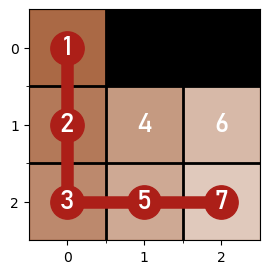

In [2]:
from collections import deque
import matplotlib.pyplot as plt

def MazeBFS(n, m, maze):

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    visited = [(0, 0)]

    parent = {}

    queue = deque([(0, 0)])

    while queue:
        row, col = queue.popleft()

        if row == n - 1 and col == m - 1:
            path = []
            while (row, col) != (0, 0):
                path.append((row, col))
                row, col = parent[(row, col)]
            path.append((0, 0))
            path.reverse()
            return len(path) - 1, path, visited

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc

            if 0 <= new_row < n and 0 <= new_col < m and maze[new_row][new_col] == 0 and (new_row, new_col) not in visited:
                visited.append((new_row, new_col))
                parent[(new_row, new_col)] = (row, col)
                queue.append((new_row, new_col))

    return -1, [], visited

def visualize_maze_with_path(maze, path, explored_cells):
    plt.figure(figsize=(len(maze[0]), len(maze)))
    plt.imshow(maze, cmap='Greys', interpolation='nearest')

    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker='o', markersize=24, color='#AC1F18', linewidth=9)

    max_alpha = 0.8
    min_alpha = 0.2
    alpha_step = (max_alpha - min_alpha) / len(explored_cells)

    current_alpha = max_alpha
    for idx, cell in enumerate(explored_cells, 1):
        plt.fill([cell[1] - 0.5, cell[1] + 0.5, cell[1] + 0.5, cell[1] - 0.5],
                [cell[0] - 0.5, cell[0] - 0.5, cell[0] + 0.5, cell[0] + 0.5],
                color='#954416', alpha=current_alpha)
        plt.text(cell[1], cell[0], str(idx), ha='center', va='center', fontsize=20, color='white', fontfamily='Bahnschrift')
        current_alpha -= alpha_step


    plt.xticks(range(len(maze[0])))
    plt.yticks(range(len(maze)))
    plt.gca().set_xticks([x - 0.5 for x in range(1, len(maze[0]))], minor=True)
    plt.gca().set_yticks([y - 0.5 for y in range(1, len(maze))], minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=2)

    plt.axis('on')
    plt.show()

n, m = map(int, input().split())
maze = [list(map(int, input().split())) for _ in range(n)]

result, path, explored_cells = MazeBFS(n, m, maze)
print(result)
# print("Minimum number of moves:", result)
# print("Path:", path)
# print("Explored cells:", explored_cells)
visualize_maze_with_path(maze, path, explored_cells)

In [ ]:
import matplotlib.pyplot as plt

def MazeDFS(n, m, maze):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    stack = [(0, 0)]
    parent = {(0, 0): None}
    explored_cells = []

    while stack:
        row, col = stack.pop()
        explored_cells.append((row, col))

        if row == n - 1 and col == m - 1:
            path = []
            while (row, col) != (0, 0):
                path.append((row, col))
                row, col = parent[(row, col)]
            path.append((0, 0))
            path.reverse()
            return len(path) - 1, path, explored_cells

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc

            if 0 <= new_row < n and 0 <= new_col < m and maze[new_row][new_col] == 0 and (new_row, new_col) not in parent:
                parent[(new_row, new_col)] = (row, col)
                stack.append((new_row, new_col))

    return -1, [], explored_cells

def visualize_maze_with_path(maze, path, explored_cells):
    plt.figure(figsize=(len(maze[0]), len(maze)))
    plt.imshow(maze, cmap='Greys', interpolation='nearest')

    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker='o', markersize=24, color='#FFD111', linewidth=9)

    max_alpha = 0.8
    min_alpha = 0.2
    alpha_step = (max_alpha - min_alpha) / len(explored_cells)

    current_alpha = max_alpha
    for idx, cell in enumerate(explored_cells, 1):
        plt.fill([cell[1] - 0.5, cell[1] + 0.5, cell[1] + 0.5, cell[1] - 0.5],
                [cell[0] - 0.5, cell[0] - 0.5, cell[0] + 0.5, cell[0] + 0.5],
                color='#113285', alpha=current_alpha)
        plt.text(cell[1], cell[0], str(idx), ha='center', va='center', fontsize=20, color='white', fontfamily='Bahnschrift')
        current_alpha -= alpha_step

    plt.xticks(range(len(maze[0])))
    plt.yticks(range(len(maze)))
    plt.gca().set_xticks([x - 0.5 for x in range(1, len(maze[0]))], minor=True)
    plt.gca().set_yticks([y - 0.5 for y in range(1, len(maze))], minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=2)

    plt.axis('on')
    plt.show()

n, m = map(int, input().split())
maze = [list(map(int, input().split())) for _ in range(n)]

(result, path, explored_cells) = MazeDFS(n, m, maze)
print(result)
# print("Minimum number of moves:", result)
# print("Path:", path)
# print("Explored cells:", explored_cells)
visualize_maze_with_path(maze, path, explored_cells)


In [ ]:
import heapq
import matplotlib.pyplot as plt

def MazeDijkstra(n, m, maze):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    dist = {(i, j): float('inf') for i in range(n) for j in range(m)}
    dist[(0, 0)] = 0

    pq = [(0, (0, 0))]

    explored_cells = [(0, 0)]

    parent = {}

    while pq:
        d, (row, col) = heapq.heappop(pq)

        if row == n - 1 and col == m - 1:
            path = []
            while (row, col) != (0, 0):
                path.append((row, col))
                row, col = parent[(row, col)]
            path.append((0, 0))
            path.reverse()
            return d, path, explored_cells

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc

            if 0 <= new_row < n and 0 <= new_col < m:
                new_dist = d + 1

                if new_dist < dist[(new_row, new_col)] and maze[new_row][new_col] == 0:
                    dist[(new_row, new_col)] = new_dist
                    heapq.heappush(pq, (new_dist, (new_row, new_col)))
                    explored_cells.append((new_row, new_col))
                    parent[(new_row, new_col)] = (row, col)

    return -1, [], set()

def visualize_maze_with_path(maze, path, explored_cells):
    plt.figure(figsize=(len(maze[0]), len(maze)))
    plt.imshow(maze, cmap='Greys', interpolation='nearest')

    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker='o', markersize=24, color='#2177B8', linewidth=9)

    max_alpha = 0.8
    min_alpha = 0.2
    alpha_step = (max_alpha - min_alpha) / len(explored_cells)

    current_alpha = max_alpha
    for idx, cell in enumerate(explored_cells, 1):
        plt.fill([cell[1] - 0.5, cell[1] + 0.5, cell[1] + 0.5, cell[1] - 0.5],
                [cell[0] - 0.5, cell[0] - 0.5, cell[0] + 0.5, cell[0] + 0.5],
                color='#986524', alpha=current_alpha)
        plt.text(cell[1], cell[0], str(idx), ha='center', va='center', fontsize=20, color='white', fontfamily='Bahnschrift')
        current_alpha -= alpha_step

    plt.xticks(range(len(maze[0])))
    plt.yticks(range(len(maze)))
    plt.gca().set_xticks([x - 0.5 for x in range(1, len(maze[0]))], minor=True)
    plt.gca().set_yticks([y - 0.5 for y in range(1, len(maze))], minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=2)

    plt.axis('on')
    plt.show()

n, m = map(int, input().split())
maze = [list(map(int, input().split())) for _ in range(n)]

result, path, explored_cells = MazeDijkstra(n, m, maze)
print(result)
# print("Minimum number of moves:", result)
# print("Path:", path)
# print("Explored cells:", explored_cells)

visualize_maze_with_path(maze, path, explored_cells)

In [ ]:
import heapq
import matplotlib.pyplot as plt

def heuristic(start, goal):
    # 计算曼哈顿距离作为启发式函数
    return abs(start[0] - goal[0]) + abs(start[1] - goal[1])

def MazeAstar(n, m, maze):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # 每个单元格的最小距离
    dist = {(i, j): float('inf') for i in range(n) for j in range(m)}
    dist[(0, 0)] = 0

    # 优先队列 (f = g + h, cell)
    pq = [(0 + heuristic((0, 0), (m - 1, n - 1)), (0, 0))]

    explored_cells = [(0, 0)]

    parent = {}

    while pq:
        f, (row, col) = heapq.heappop(pq)
        g = f - heuristic((row, col), (m - 1, n - 1))

        # 检查是否到达右下角
        if row == n - 1 and col == m - 1:
            path = []
            while (row, col) != (0, 0):
                path.append((row, col))
                row, col = parent[(row, col)]
            path.append((0, 0))
            path.reverse()
            return g, path, explored_cells

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc

            # 检查新位置是否在迷宫内
            if 0 <= new_row < n and 0 <= new_col < m:
                new_dist = g + 1

                if new_dist < dist[(new_row, new_col)] and maze[new_row][new_col] == 0:
                    dist[(new_row, new_col)] = new_dist
                    heapq.heappush(pq, (new_dist + heuristic((new_row, new_col), (m - 1, n - 1)), (new_row, new_col)))
                    explored_cells.append((new_row, new_col))
                    parent[(new_row, new_col)] = (row, col)

    return -1, [], set()

def visualize_maze_with_path(maze, path, explored_cells):
    plt.figure(figsize=(len(maze[0]), len(maze)))
    plt.imshow(maze, cmap='Greys', interpolation='nearest')

    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker='o', markersize=24, color='#7E1671', linewidth=9)

    max_alpha = 0.8
    min_alpha = 0.2
    alpha_step = (max_alpha - min_alpha) / len(explored_cells)

    current_alpha = max_alpha
    for idx, cell in enumerate(explored_cells, 1):
        plt.fill([cell[1] - 0.5, cell[1] + 0.5, cell[1] + 0.5, cell[1] - 0.5],
                [cell[0] - 0.5, cell[0] - 0.5, cell[0] + 0.5, cell[0] + 0.5],
                color='#126E82', alpha=current_alpha)
        plt.text(cell[1], cell[0], str(idx), ha='center', va='center', fontsize=20, color='white', fontfamily='Bahnschrift')
        current_alpha -= alpha_step

    plt.xticks(range(len(maze[0])))
    plt.yticks(range(len(maze)))
    plt.gca().set_xticks([x - 0.5 for x in range(1, len(maze[0]))], minor=True)
    plt.gca().set_yticks([y - 0.5 for y in range(1, len(maze))], minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=2)

    plt.axis('on')
    plt.show()

n, m = map(int, input().split())
maze = [list(map(int, input().split())) for _ in range(n)]

result, path, explored_cells = MazeAstar(n, m, maze)
print(result)
# print("Minimum number of moves:", result)
# print("Path:", path)
# print("Explored cells:", explored_cells)

visualize_maze_with_path(maze, path, explored_cells)
